### Initialization

#### Bossdata

In [2]:
import bossdata
print(bossdata.__version__)

0.3.1


In [3]:
import bossdata.path
import bossdata.remote
import bossdata.meta as meta
import bossdata.spec as spec
import bossdata.plate as plate

#### Astropy

In [4]:
import astropy.io.fits as fits
from astropy.table import unique,Table

In [10]:
import os
workdir = os.environ['SCRATCH']
os.environ["BOSS_DATA_URL"] = 'http://dr12.sdss3.org'
os.environ["BOSS_LOCAL_ROOT"] = os.path.join(workdir,'sdss')
os.environ["BOSS_SAS_PATH"] = '/sas/dr12/boss'
os.environ["BOSS_REDUX_VERSION"]='v5_7_0'

In [6]:
finder = bossdata.path.Finder()
mirror = bossdata.remote.Manager()

In [7]:
os.chdir(workdir)

In [8]:
os.getcwd()

'/scratch/kunjias'

In [11]:
workdir

'/scratch/kunjias'

### spAll

In [12]:
spAll_path = finder.get_sp_all_path(lite=False)

In [13]:
spAll_path

'/sas/dr12/boss/spectro/redux/v5_7_0/spAll-v5_7_0.fits'

In [14]:
spAll_file = mirror.get(spAll_path, progress_min_size=2, auto_download=True, local_paths=None)

In [15]:
spAll_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/spAll-v5_7_0.fits'

In [16]:
local_path = 'home/kunjias/scratch'

In [17]:
meta.create_meta_full(catalog_path = spAll_file,db_path= local_path,verbose=True, primary_key='(PLATE,MJD,FIBER)')

/project/6016730/mlhaa/lib/python3.6/site-packages/bossdata/meta.py:61: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(dtype, np.float):
/project/6016730/mlhaa/lib/python3.6/site-packages/bossdata/meta.py:63: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  elif np.issubdtype(dtype, np.str) or np.issubdtype(dtype, np.bytes_):
Writing 100%|#################################################################|


### Bossdata.meta Database
Initialize searchable databse of BOSS observation metadata.

In [18]:
spAll= bossdata.meta.Database(finder=finder, mirror=mirror, lite=False, quasar_catalog=False, quasar_catalog_name=None, platelist=False, verbose=False)

In [19]:
columns = spAll.prepare_columns('*')

In [52]:
#columns

Fetch results of feature information using SQL Select Query.

| name  | description | file source |
|------ |-----------| -----------|
| XFOCAL | Hole x-axis position in focal plane (mm) | plPlugMap |
| YFOCAL | Hole y-axis position in focal plane (mm) | plPlugMap |
| PLATE | Plate ID | spZbest |
| MJD   | Modified Julian date of observation | spZbest |
| FIBER | Fiber ID | spZbest |
| RA | Right ascension of telescope boresights(deg) | photoObj |
| DEC | Declination of telescope boresight (deg) | photoObj |
| AIRMASS_0 | Airmass at time of observation | photoObj |
| AIRMASS_1 |-- | --|
| AIRMASS_2 | --| --|
| AIRMASS_3 |-- |-- |
| AIRMASS_4 |-- |-- |

| SEEING 20 |                                   |
| SEEING 50 |                                     |
| SEEING 80 |                                      |

In [40]:
columns_names ='PLATE,MJD, XFOCAL,YFOCAL,FIBER,RA,DEC,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4'

In [41]:
columns_names

'PLATE,MJD, XFOCAL,YFOCAL,FIBER,RA,DEC,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4'

In [45]:
features_spAll = spAll.select_all(what = columns_names,where=None,sort=None,max_rows=None)

In [48]:
features_spAll

PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4
int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
3586,55181,290.4083251953125,-100.94261932373047,1,9.331912240761937,-0.46295465595501833,1.3931663036346436,1.402037501335144,1.3845560550689697,1.3888276815414429,1.3975642919540405
3586,55181,290.10784912109375,-136.1317138671875,2,9.330077908085968,-0.6241158950124553,1.3961660861968994,1.4050742387771606,1.3875188827514648,1.3918077945709229,1.4005820751190186
3586,55181,312.33843994140625,-53.472434997558594,3,9.432105925316963,-0.24518153601304604,1.1955134868621826,1.1964384317398071,1.1947202682495117,1.195099949836731,1.195959448814392
3586,55181,311.3415222167969,-74.46633911132812,4,9.427406000439102,-0.3414065792197985,1.1968247890472412,1.1977523565292358,1.196029782295227,1.1964107751846313,1.1972718238830566
3586,55181,298.4267578125,-73.9637680053711,5,9.368674678655001,-0.3392240124253553,1.196795105934143,1.1977224349975586,1.196000099182129,1.196380853652954,1.1972419023513794
3586,55181,307.2918395996094,-54.528682708740234,6,9.409156644237045,-0.2500578433416338,1.1955798864364624,1.1965056657791138,1.1947864294052124,1.1951665878295898,1.1960258483886719
3586,55181,296.58929443359375,-46.39889907836914,7,9.360470369583934,-0.21284236857353117,1.195074200630188,1.195999026298523,1.1942815780639648,1.1946611404418945,1.1955196857452393
3586,55181,294.7062683105469,-34.79413604736328,8,9.351932355972735,-0.15962225110457692,1.2973734140396118,1.3033195734024048,1.2916183471679688,1.2944709062576294,1.3003202676773071
3586,55181,316.6907958984375,-22.958707809448242,9,9.452027474817498,-0.1052714142176597,1.2965061664581299,1.302443027496338,1.2907588481903076,1.2936073541641235,1.2994486093521118


In [28]:
plate_spAll = spAll.select_all(what='PLATE', where= None, sort=None, max_rows=None)

In [30]:
MJD_spAll = spAll.select_all(what='MJD', where= None, sort=None, max_rows=None)

In [32]:
FIBER_spAll = spAll.select_all(what='FIBER', where= None, sort=None, max_rows=None)

In [37]:
AIRMASS_0_spAll = spAll.select_all(what='AIRMASS_0', where=None, sort=None, max_rows=None)

In [53]:
plate_unique = unique(plate_spAll )

# Dec 3rd, Monday, Summary

This table above is a manual combination of feature columns with information mainly from the spAll file. The (wavelength,flux) matrix needs to be added to each row of fiber.

spec file is found to contain spectrum exposure information (flux, sky flux, ivar) by grouping information from spFrame, spCFrame, spPlate, spZbest, spZline, and spAll files.

The next step could be looping through each fiber to extract the exposure information from spec file, or directly combine information from various files noted above with the spAll matrix.

In [55]:
def get_plugmap(plate_number, mjd):
    '''Return a binary table of Plug-map structure.
    
    Parameters
    -----------
    plate_number: Specified plate number, must be positive
    mjd: modified julian date of the observation associated with input plate, must be > 45000.
    
    Output
    -------
    A binary table
    '''
    
    # Get path to file containing combined spectra for a whole plate
    plate_file_path = finder.get_plate_spec_path(plate_number, mjd)
    
    # Automatically mirrored
    plate_file = mirror.get(plate_file_path, progress_min_size=2, auto_download=True, local_paths=None)
    
    # A BOSS plate file containing combined exposures for a whole plate
    whole_plate = plate.PlateFile(plate_file)
    # The attribute which record this plate's plug map
    plug_map = whole_plate.plug_map
    
    print("Plug_map of", plate_number, "at Modified Julian Date", mjd )
    return plug_map

## Please Disregard things below

In [54]:
mjd_list = bossdata.meta.get_plate_mjd_list(plate = 3586, finder = None, mirror = None)

In [55]:
mjd_list

[55181]

bossdata.meta.sql_create_table -> prepare an SQL statement to create a database for a numpy structured array.

### bossdata.path

In [88]:
spectrum_3586_1000_path = finder.get_spec_path(plate=3586,mjd=55181,fiber=1000,lite=False)

In [90]:
spectrum_3586_1000_path

'/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3586/spec-3586-55181-1000.fits'

In [91]:
spectra_3586_path = finder.get_plate_spec_path(plate =3586, mjd = 55181)

In [92]:
spectra_3586_path

'/sas/dr12/boss/spectro/redux/v5_7_0/3586/spPlate-3586-55181.fits'

### bossdata.remote

In [96]:
spectrum_3586_1000_fits = mirror.get(spectrum_3586_1000_path, progress_min_size = 2, auto_download=True, local_paths=None)

In [97]:
spectrum_3586_1000_fits

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3586/spec-3586-55181-1000.fits'

### bossdata.spec

In [271]:
spectrum_3586_1000 = fits.open(spectrum_3586_1000_fits)

In [281]:
type(spectrum_3586_1000)

astropy.io.fits.hdu.hdulist.HDUList

#### Exposures

In [274]:
spectrum_3586_1000_header = spectrum_3586_1000[0].header

A function to transform header type into dictionary type.

In [112]:
def header_to_dict(Header):
    dict_header = {}
    for i in range(0,len(Header)):
        dict_header[list(Header.keys())[i]] = Header[i]
        
    return dict_header

In [113]:
spectrum_3586_1000_dict = header_to_dict(spectrum_3586_1000_header)

In [283]:
#spectrum_3586_1000_header

In [270]:
#spectrum_3586_1000_dict

In [147]:
exposures_3586_1000 = spec.Exposures(spectrum_3586_1000_header)

In [149]:
spec.Exposures(spectrum_3586_1000_dict)

#### Is converting to "dict" format necessary?

In [150]:
exposures_3586_1000.get_info(0,'b2')

offset,camera,science,flat,arc
int32,bytes2,int32,int32,int32
0,b2,104927,104934,104935


In [151]:
exposures_3586_1000.get_info(0,'r2')

offset,camera,science,flat,arc
int32,bytes2,int32,int32,int32
7,r2,104927,104934,104935


In [152]:
exposures_3586_1000.get_info(6,'r2')

offset,camera,science,flat,arc
int32,bytes2,int32,int32,int32
13,r2,104933,104934,104935


#### spec

In [154]:
SpecFile_3586_1000 = spec.SpecFile(spectrum_3586_1000_fits)

In [156]:
SpecFile_3586_1000.get_exposure_hdu(0,'r2')


  file: /scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3586/spec-3586-55181-1000.fits
  extension: 11
  type: BINARY_TBL
  extname: R2-00104927-00104934-00104935
  rows: 3154
  column info:
    flux                f4  
    loglam              f4  
    ivar                f4  
    mask                i4  
    wdisp               f4  
    sky                 f4  
    calib               f4  
    x                   f4  

In [202]:
SpecFile_3586_1000.get_exposure_name(sequence_number = 2,
                                    band = 'red',
                                    ftype = 'spCFrame')

'spCFrame-r2-00104929.fits'

In [164]:
SpecFile_3586_1000.get_pixel_mask()

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [222]:
plate3586_fiber1000_exposure08=SpecFile_3586_1000.get_valid_data(exposure_index=0, 
                                  camera='r2', 
                                  pixel_quality_mask=None, 
                                  include_wdisp=False,
                                  include_sky=True, 
                                  use_ivar=False, 
                                  use_loglam=False, 
                                  fiducial_grid=False)

In [223]:
data_plate3586_fiber1000_exposure08 = plate3586_fiber1000_exposure08.data

In [225]:
data_plate3586_fiber1000_exposure08

array([( 5902.7227,  6.998139 ,  8.638592, 12.053816),
       ( 5904.064 ,  2.200818 ,  7.794687, 10.22544 ),
       ( 5905.403 , 12.786961 ,  7.782696,  8.667742), ...,
       (10353.862 , -5.5906186,  9.617459, 23.124233),
       (10355.271 , -5.8272276, 11.215535, 26.230238),
       (10356.682 , 10.499031 , 13.026062, 24.17344 )],
      dtype=[('wavelength', '<f4'), ('flux', '<f4'), ('dflux', '<f4'), ('sky', '<f4')])

In [238]:
wlen_plate3586_fiber1000_exposure08 = data_plate3586_fiber1000_exposure08['wavelength'][:]

In [239]:
flux_plate3586_fiber1000_exposure08 = data_plate3586_fiber1000_exposure08['flux'][:]

In [240]:
sky_plate3586_fiber1000_exposure08 = data_plate3586_fiber1000_exposure08['sky'][:]

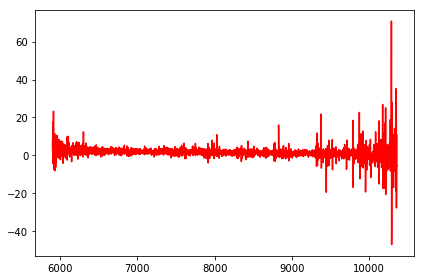

In [248]:
x = wlen_plate3586_fiber1000_exposure08
y = flux_plate3586_fiber1000_exposure08
plt.plot(x,y,c='r')
plt.tight_layout()
plt.show()

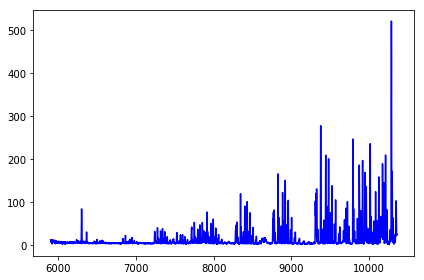

In [245]:
x = wlen_plate3586_fiber1000_exposure08
y = sky_plate3586_fiber1000_exposure08
plt.plot(x,y,c = 'b')
plt.tight_layout()
plt.show()

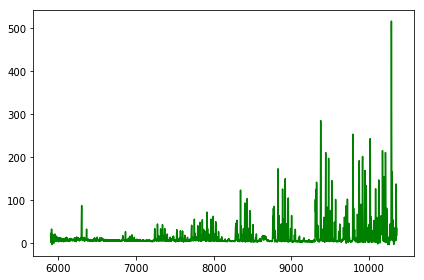

In [247]:
x = wlen_plate3586_fiber1000_exposure08
y = sky_plate3586_fiber1000_exposure08 + flux_plate3586_fiber1000_exposure08 
plt.plot(x,y,c = 'g')
plt.tight_layout()
plt.show()

In [228]:
data_plate3586_fiber1000_exposure08.shape

(3154,)

Wavelength of a particular integral pixel.

In [200]:
spec.fiducial_loglam[100]

3.554100305027835

Bounding wavelength range

In [198]:
10**spec.fiducial_loglam[[0,-1]]

array([ 3500.26      , 10568.18251472])